<a href="https://www.kaggle.com/code/melsagzet/customerchurnfeatureengineering?scriptVersionId=113039684" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <p style="padding: 10px;background-color:#F0F8F;margin:0;color:black;font-family:'Trebuchet MS', sans-serif;font-size:150%;text-align:center;text-shadow: -1px 1px 0 #000,1px 1px 0 #000,1px -1px 0 #000,-1px -1px 0 #000;border-radius: 1000px 1000px;overflow:hidden;font-weight:500">TELCO CUSTOMER CHURN FEATURE ENGINEERING</p>

<p style="text-align:center; ">
<img src="https://cdn.smartkarrot.com/wp-content/uploads/2020/11/At-risk-customers.png" style='width: 360px; height: 270px;'>
</p>
 
* **Problem:** It is desired to develop a machine learning model that can predict the customers who will leave the company. You are expected to perform the necessary data analysis and feature engineering steps before developing the model.


* Telco customer churn data includes information about a fictitious telecom company that provided home phone and Internet services to 7043 California customers in the third quarter. It includes which customers have left, stayed or signed up for their service.

### **The dataset includes information about**
* Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

* Variables contain information about customer service, account, and demographics.

* Customers who left within the last month – the column is called **Churn**

* Demographic information about customers - gender, senior citizen, and whether they have partners and dependents

* Customer account information – how long they have been a customer, contract, payment method, paperless billing, monthly charges and total charges

* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies




 **$\star$ 21 Variable 7043 Observation**
 
**<u>Demographic Information</u>**

* **Gender :** Whether the customer is a female or a male (Male, Female)

* **SeniorCitizen :** Whether the customer is a senior citizen or not  (1, 0)

* **Partner :** Whether the customer has a partner or not  (Yes, No) ? Whether to be married


* **Dependents :** Whether the customer has dependents or not  (Yes, No) (Child, mother, father, grandmother)

**<u>Customer Account Information</u>**

* **tenure :** Number of months the customer has stayed with the company(Multiple different numeric values)

* **Contract :** Indicates the customer’s current contract type (Month-to-Month, One year, Two year)

* **PaperlessBilling :** Whether the customer has paperless billing or not (Yes, No)

* **PaymentMethod :** The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit - Card (automatic))

* **MonthlyCharges :** The amount charged to the customer monthly (Multiple different numeric values)

* **TotalCharges :** The total amount charged to the customer (Multiple different numeric values)


**<u>Service Information</u>**

* **PhoneService :**  Whether the customer has a phone service or not (Yes, No)

* **MultipleLines :** Whether the customer has multiple lines or not (No phone service, No, Yes)

* **InternetService :** Whether the customer is subscribed to Internet service with the company (DSL, Fiber optic, No)

* **OnlineSecurity :** Whether the customer has online security or not (No internet service, No, Yes)

* **OnlineBackup :** Whether the customer has online backup or not (No internet service, No, Yes)

* **DeviceProtection :** Whether the customer has device protection or not (No internet service, No, Yes)

* **TechSupport :** Whether the customer has tech support or not (No internet service, No, Yes)

* **StreamingTV :** Whether the customer has streaming TV or not (No internet service, No, Yes)

* **StreamingMovies :** Whether the customer has streaming movies or not (No internet service, No, Yes)



* **Loading the Libraries to be Used**

In [1]:
#pip install catboost

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import missingno as msno
from datetime import date
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV, validation_curve

from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,roc_curve
import warnings
warnings.simplefilter(action="ignore")

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.float_format", lambda x: "%.3f" % x)
pd.set_option("display.width", 500)

# **Importing Dataset**

In [3]:
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes


In [4]:
df.columns = [col.lower() for col in df.columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   seniorcitizen     7043 non-null   int64  
 3   partner           7043 non-null   object 
 4   dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   phoneservice      7043 non-null   object 
 7   multiplelines     7043 non-null   object 
 8   internetservice   7043 non-null   object 
 9   onlinesecurity    7043 non-null   object 
 10  onlinebackup      7043 non-null   object 
 11  deviceprotection  7043 non-null   object 
 12  techsupport       7043 non-null   object 
 13  streamingtv       7043 non-null   object 
 14  streamingmovies   7043 non-null   object 
 15  contract          7043 non-null   object 
 16  paperlessbilling  7043 non-null   object 


In [6]:
#must be a numeric variable
df["totalcharges"] = pd.to_numeric(df["totalcharges"], errors='coerce')

In [7]:
df.isnull().sum()

customerid           0
gender               0
seniorcitizen        0
partner              0
dependents           0
tenure               0
phoneservice         0
multiplelines        0
internetservice      0
onlinesecurity       0
onlinebackup         0
deviceprotection     0
techsupport          0
streamingtv          0
streamingmovies      0
contract             0
paperlessbilling     0
paymentmethod        0
monthlycharges       0
totalcharges        11
churn                0
dtype: int64

* **When totalcharge was converted to a numerical variable, 11 missing observations were revealed. When 11 observations are examined, it is seen that these are new customers.**

In [8]:
df[df["totalcharges"].isnull()]

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.550,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.250,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.850,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.750,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.050,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.850,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.350,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.000,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.700,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.350,NaN,No


* **These new customers who have not paid any fees yet, I chose to fill with 0.**

In [9]:
df["totalcharges"].fillna(value= 0, inplace = True)

In [10]:
df.describe([0.01, 0.05, 0.25, 0.50, 0.75, 0.95, 0.99]).T

,count,mean,std,min,1%,5%,25%,50%,75%,95%,99%,max
seniorcitizen,7043.000,0.162,0.369,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,1.000
tenure,7043.000,32.371,24.559,0.000,1.000,1.000,9.000,29.000,55.000,72.000,72.000,72.000
monthlycharges,7043.000,64.762,30.090,18.250,19.200,19.650,35.500,70.350,89.850,107.400,114.729,118.750
totalcharges,7043.000,2279.734,2266.794,0.000,19.750,48.600,398.550,1394.550,3786.600,6921.025,8039.256,8684.800


In [11]:
df.describe(include=object).T

,count,unique,top,freq
customerid,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
partner,7043,2,No,3641
dependents,7043,2,No,4933
phoneservice,7043,2,Yes,6361
multiplelines,7043,3,No,3390
internetservice,7043,3,Fiber optic,3096
onlinesecurity,7043,3,No,3498
onlinebackup,7043,3,No,3088
deviceprotection,7043,3,No,3095


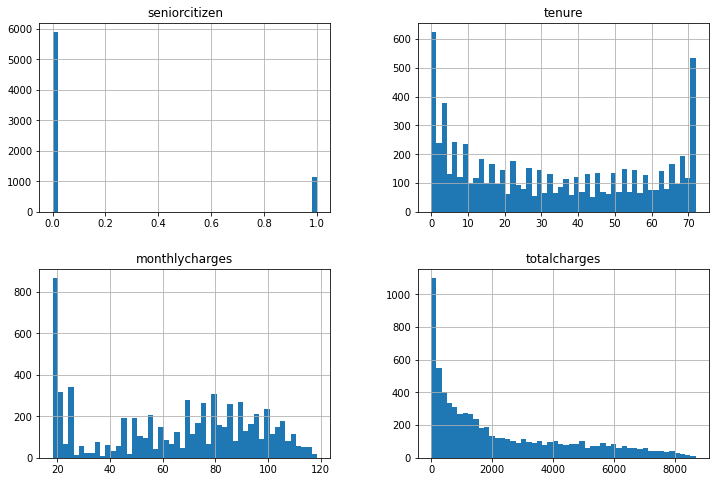

In [12]:
df.hist(bins=50, figsize=(12, 8))
plt.show()

In [13]:
def grab_col_names(dataframe, cat_th=3, car_th=10):

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 7043
Variables: 21
cat_cols: 17
num_cols: 3
cat_but_car: 1
num_but_cat: 1


In [14]:
cat_but_car

['customerid']

In [15]:
num_cols

['tenure', 'monthlycharges', 'totalcharges']

In [16]:
cat_cols

['gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'churn',
 'seniorcitizen']

* **It has been dropped because no feature extraction will be made with the customer id.**

In [17]:
df.drop(labels = "customerid", axis = 1, inplace = True)

# **Categorical Variables Analysis**

        gender  Ratio
Male      3555 50.476
Female    3488 49.524
********************************************************************************


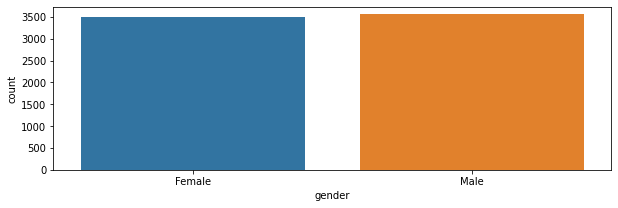

     partner  Ratio
No      3641 51.697
Yes     3402 48.303
********************************************************************************


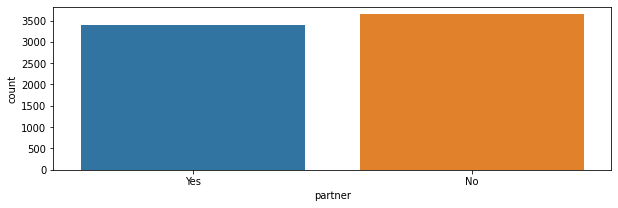

     dependents  Ratio
No         4933 70.041
Yes        2110 29.959
********************************************************************************


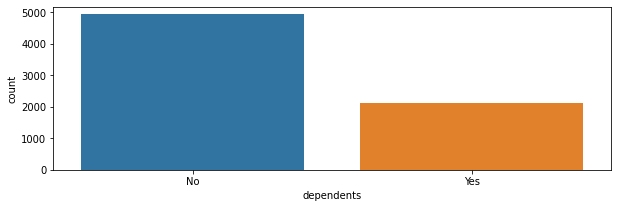

     phoneservice  Ratio
Yes          6361 90.317
No            682  9.683
********************************************************************************


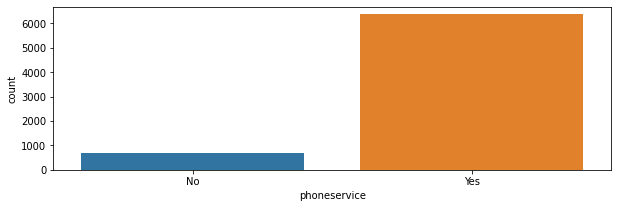

                  multiplelines  Ratio
No                         3390 48.133
Yes                        2971 42.184
No phone service            682  9.683
********************************************************************************


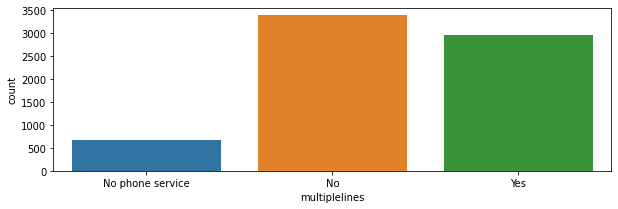

             internetservice  Ratio
Fiber optic             3096 43.959
DSL                     2421 34.375
No                      1526 21.667
********************************************************************************


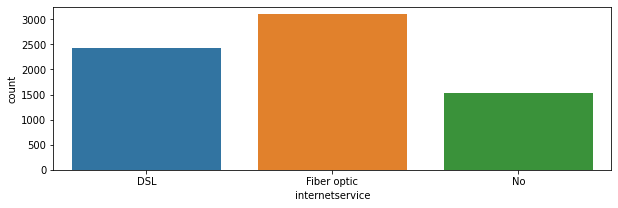

                     onlinesecurity  Ratio
No                             3498 49.666
Yes                            2019 28.667
No internet service            1526 21.667
********************************************************************************


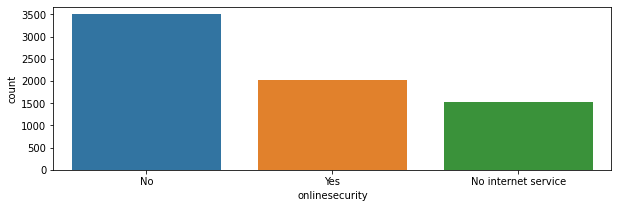

                     onlinebackup  Ratio
No                           3088 43.845
Yes                          2429 34.488
No internet service          1526 21.667
********************************************************************************


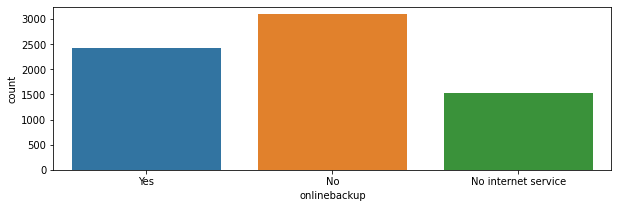

                     deviceprotection  Ratio
No                               3095 43.944
Yes                              2422 34.389
No internet service              1526 21.667
********************************************************************************


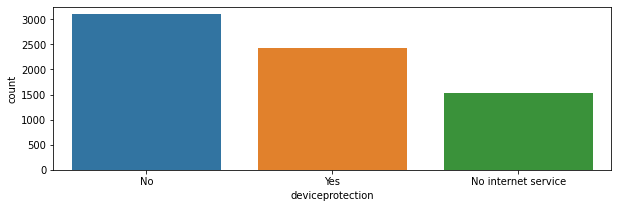

                     techsupport  Ratio
No                          3473 49.311
Yes                         2044 29.022
No internet service         1526 21.667
********************************************************************************


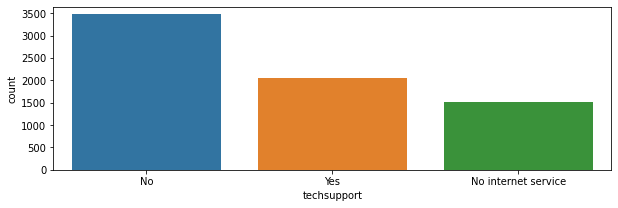

                     streamingtv  Ratio
No                          2810 39.898
Yes                         2707 38.435
No internet service         1526 21.667
********************************************************************************


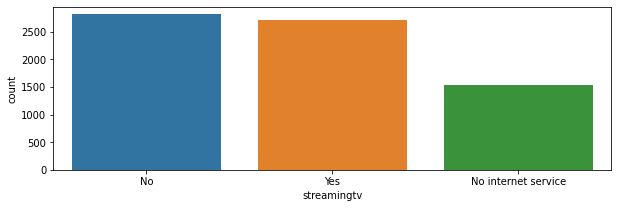

                     streamingmovies  Ratio
No                              2785 39.543
Yes                             2732 38.790
No internet service             1526 21.667
********************************************************************************


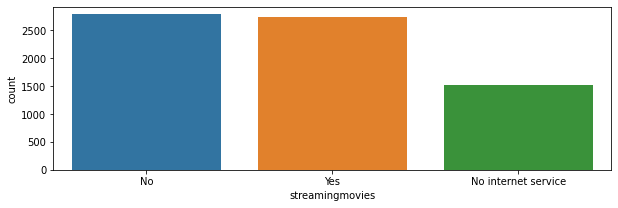

                contract  Ratio
Month-to-month      3875 55.019
Two year            1695 24.066
One year            1473 20.914
********************************************************************************


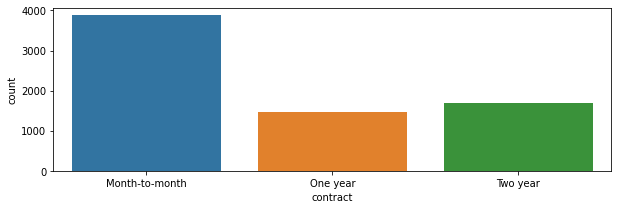

     paperlessbilling  Ratio
Yes              4171 59.222
No               2872 40.778
********************************************************************************


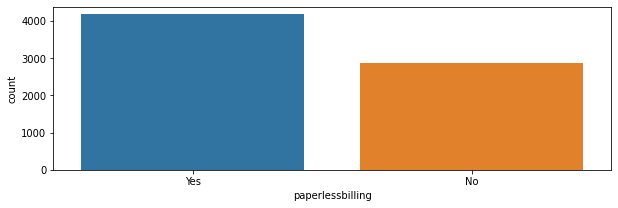

                           paymentmethod  Ratio
Electronic check                    2365 33.579
Mailed check                        1612 22.888
Bank transfer (automatic)           1544 21.922
Credit card (automatic)             1522 21.610
********************************************************************************


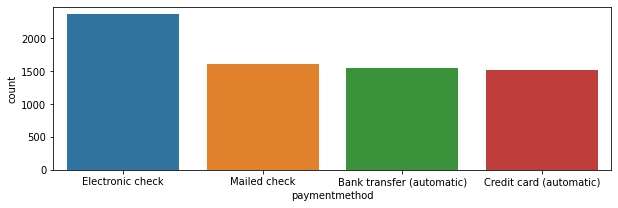

     churn  Ratio
No    5174 73.463
Yes   1869 26.537
********************************************************************************


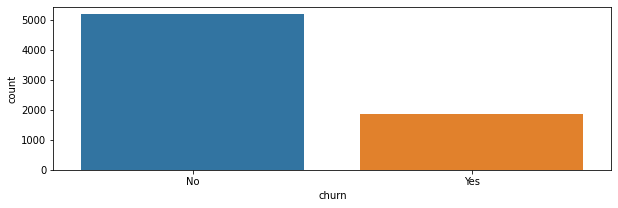

   seniorcitizen  Ratio
0           5901 83.785
1           1142 16.215
********************************************************************************


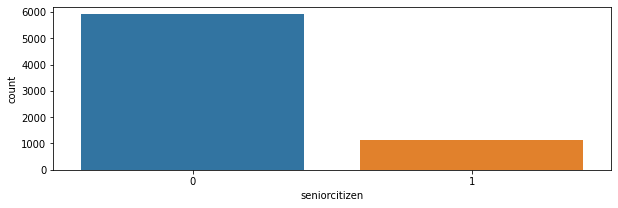

In [18]:
def cat_summary(dataframe, col_name, plot=False):

    if dataframe[col_name].dtypes == "bool":
        dataframe[col_name] = dataframe[col_name].astype(int)

        print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                            "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
       

        if plot:
            sns.countplot(x=dataframe[col_name], data=dataframe)
            plt.show(block=True)
    else:
        print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                            "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
        print(80*"*")

        if plot:
            plt.figure(figsize=(10,3))
            sns.countplot(x=dataframe[col_name], data=dataframe)
            plt.show(block=True)

for col in cat_cols:
    cat_summary(df, col, plot=True)

* **The relationship between churn variable and categorical variables**

*************************************************************************************


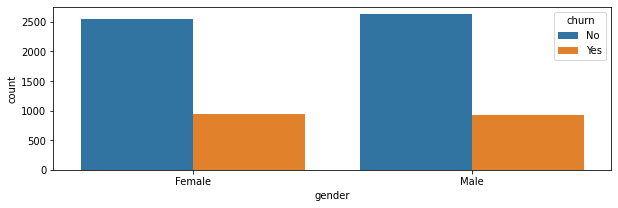

*************************************************************************************


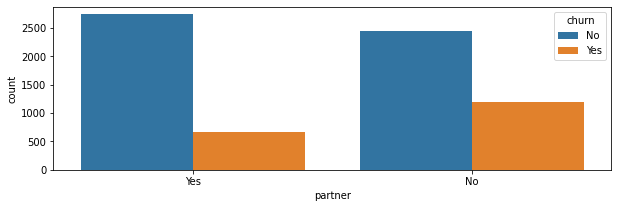

*************************************************************************************


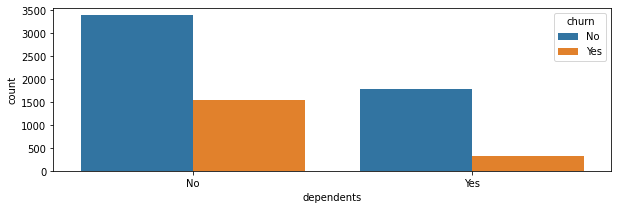

*************************************************************************************


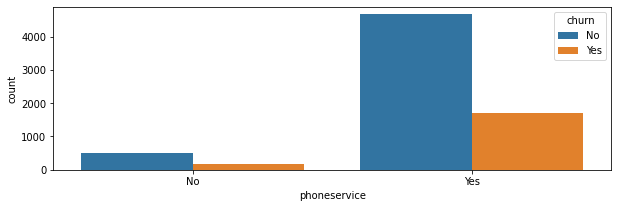

*************************************************************************************


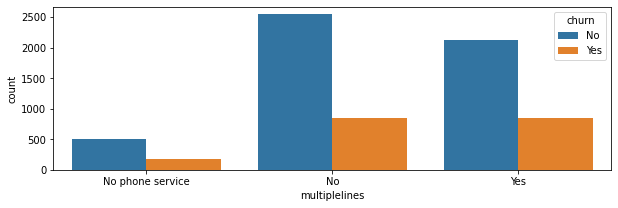

*************************************************************************************


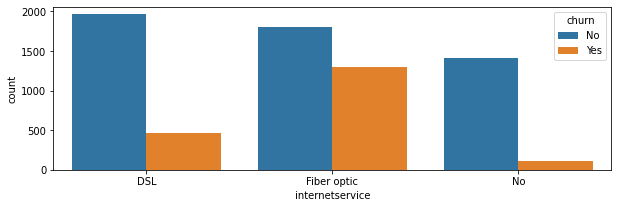

*************************************************************************************


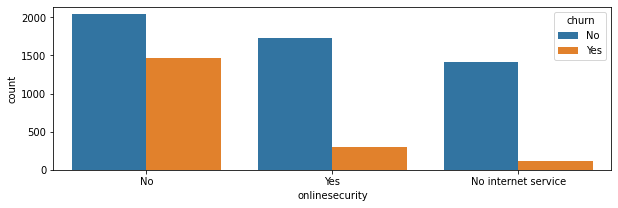

*************************************************************************************


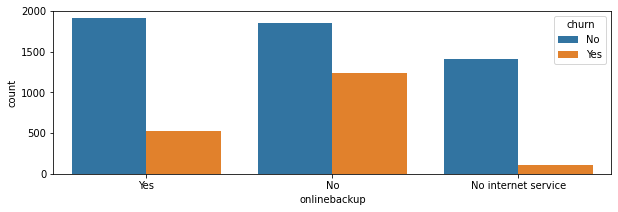

*************************************************************************************


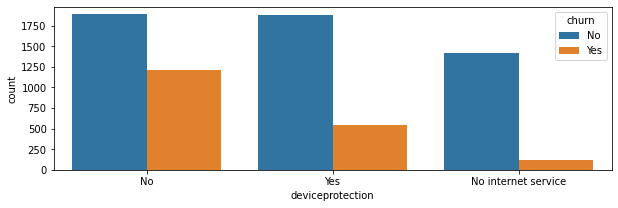

*************************************************************************************


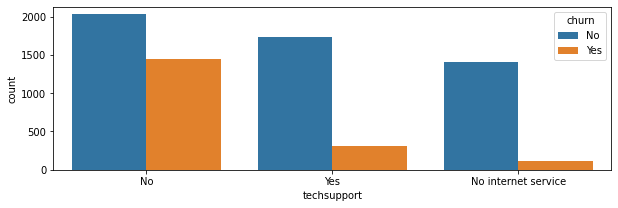

*************************************************************************************


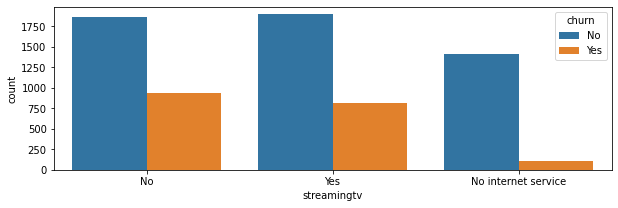

*************************************************************************************


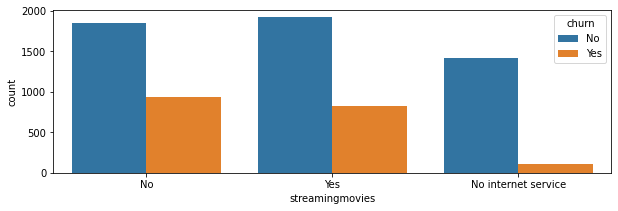

*************************************************************************************


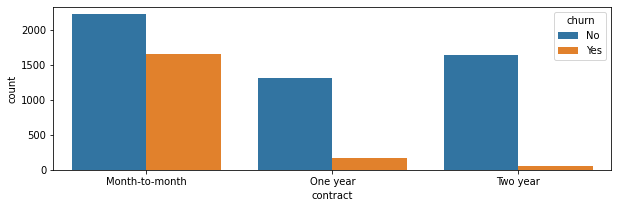

*************************************************************************************


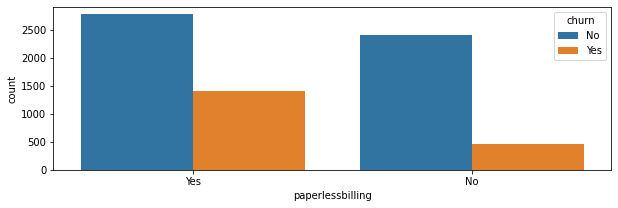

*************************************************************************************


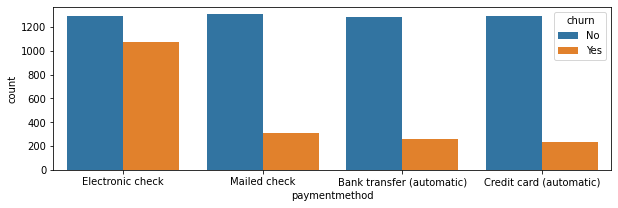

*************************************************************************************


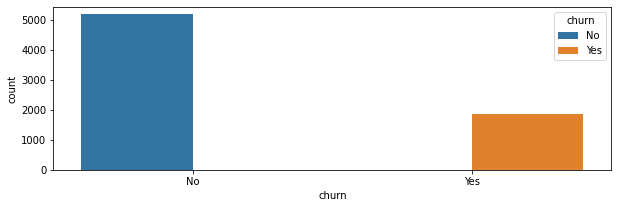

*************************************************************************************


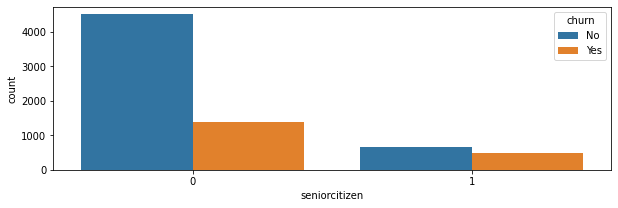

In [19]:
def cat_summary(dataframe, col_name, plot=False):
    if dataframe[col_name].dtypes == "bool":
        dataframe[col_name] = dataframe[col_name].astype(int)

        if plot:
            sns.countplot(x=dataframe[col_name], data=dataframe, hue ="churn")
            plt.show(block=True)
    else:
        print(85*"*")
        if plot:
            plt.figure(figsize=(10,3))
            sns.countplot(x=dataframe[col_name], data=dataframe, hue ="churn")
            plt.show(block=True)

for col in cat_cols:
    cat_summary(df, col, plot=True)

#  **Numeric Variables Analysis**

count   7043.000
mean      32.371
std       24.559
min        0.000
5%         1.000
10%        2.000
20%        6.000
30%       12.000
40%       20.000
50%       29.000
60%       40.000
70%       50.000
80%       60.000
90%       69.000
95%       72.000
99%       72.000
max       72.000
Name: tenure, dtype: float64


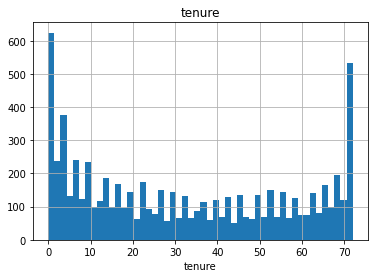

count   7043.000
mean      64.762
std       30.090
min       18.250
5%        19.650
10%       20.050
20%       25.050
30%       45.850
40%       58.830
50%       70.350
60%       79.100
70%       85.500
80%       94.250
90%      102.600
95%      107.400
99%      114.729
max      118.750
Name: monthlycharges, dtype: float64


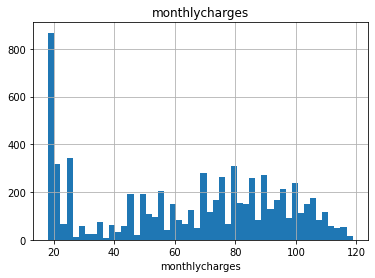

count   7043.000
mean    2279.734
std     2266.794
min        0.000
5%        48.600
10%       83.470
20%      265.320
30%      548.400
40%      939.780
50%     1394.550
60%     2043.710
70%     3132.750
80%     4471.440
90%     5973.690
95%     6921.025
99%     8039.256
max     8684.800
Name: totalcharges, dtype: float64


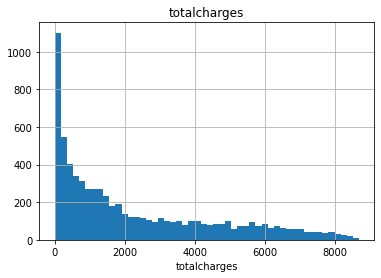

In [20]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=50)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()


for col in num_cols:
    num_summary(df, col, plot=True)

In [21]:
df["tenure"].value_counts().sort_values(ascending = False).head()

1     613
72    362
2     238
3     200
4     176
Name: tenure, dtype: int64

* **Based on the Tenure chart, it is observed that the number of our customers staying in our company for 1 month and 72 months is high. Considering that these periods have a connection with the contract periods, the following examinations were made.**  

In [22]:
df["contract"].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: contract, dtype: int64

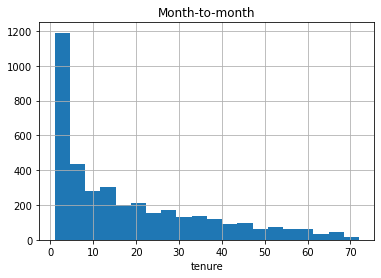

In [23]:
df[df["contract"] == "Month-to-month"]["tenure"].hist(bins=20)
plt.xlabel("tenure")
plt.title("Month-to-month")
plt.show()

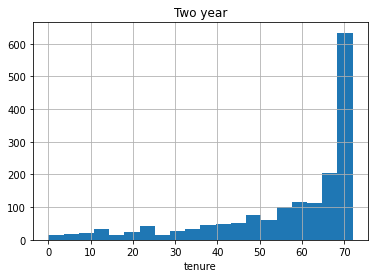

In [24]:
df[df["contract"] == "Two year"]["tenure"].hist(bins=20)
plt.title("Two year")
plt.xlabel("tenure")
plt.show()

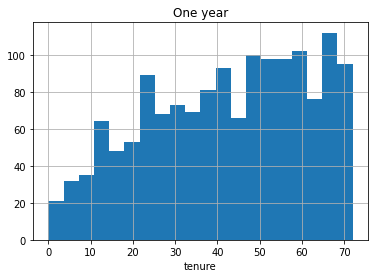

In [25]:
df[df["contract"] == "One year"]["tenure"].hist(bins=20)
plt.xlabel("tenure")
plt.title("One year")
plt.show()

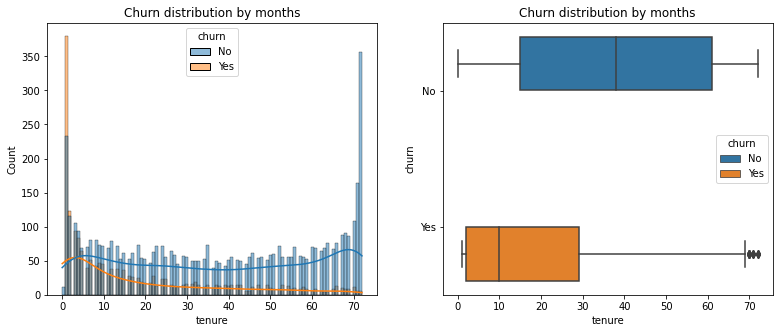

In [26]:
fig, ax = plt.subplots(1,2, figsize = (13,5))
sns.histplot(x = 'tenure', hue = 'churn', data = df, kde = True,  
             bins = 100, ax = ax[0]).set_title("Churn distribution by months");

sns.boxplot(x = 'tenure', y = 'churn', data = df, hue = 'churn', 
            ax = ax[1]).set_title("Churn distribution by months");

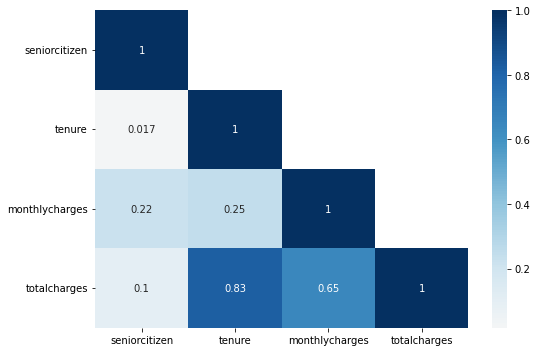

In [27]:
num_cols = [col for col in df.columns if df[col].dtype in ["int", "float"]]
corr = df[num_cols].corr()
cor_matrix = df.corr()
lower_triangle_matrix = cor_matrix.where(np.tril(np.ones(cor_matrix.shape)).astype(np.bool))


plt.subplots(figsize=(8,5))
sns.heatmap(lower_triangle_matrix, cmap="RdBu", annot = True, center = 0);
plt.tight_layout()

* **Here we can see that the "totalcharges" variable has a strong correlation with the "tenure" and "monthlycharges" variables.**

In [28]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")


for col in num_cols:
    target_summary_with_num(df, "churn", col)

       seniorcitizen
churn               
No             0.129
Yes            0.255


       tenure
churn        
No     37.570
Yes    17.979


       monthlycharges
churn                
No             61.265
Yes            74.441


       totalcharges
churn              
No         2549.911
Yes        1531.796




<AxesSubplot:xlabel='tenure', ylabel='totalcharges'>

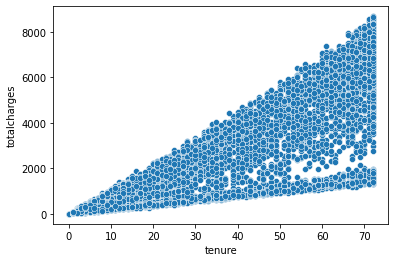

In [29]:
 sns.scatterplot(x="tenure", y="totalcharges", data = df)

In [30]:
df.groupby(["tenure"]).agg({"totalcharges":"mean","monthlycharges":"mean"}).sort_values(by = "tenure",ascending = False).head()

,totalcharges,monthlycharges
tenure,,
72,5812.445,80.696
71,5238.586,73.736
70,5349.057,76.379
69,4876.042,70.823
68,5006.300,73.321


* **Churn is the target variable, so it is converted to a numeric value.**

In [31]:
df["churn"] = df["churn"].replace({"No":0, "Yes": 1})
df.head(3)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.850,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.950,1889.500,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.150,1


In [32]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(categorical_col)
    print(pd.DataFrame({"TARGET_MEAN": dataframe.groupby(categorical_col)[target].mean(),
                        "Count": dataframe[categorical_col].value_counts(),
                        "Ratio": 100 * dataframe[categorical_col].value_counts() / len(dataframe)}), end="\n\n\n")


for col in cat_cols:
    target_summary_with_cat(df, "churn", col)

gender
        TARGET_MEAN  Count  Ratio
Female        0.269   3488 49.524
Male          0.262   3555 50.476


partner
     TARGET_MEAN  Count  Ratio
No         0.330   3641 51.697
Yes        0.197   3402 48.303


dependents
     TARGET_MEAN  Count  Ratio
No         0.313   4933 70.041
Yes        0.155   2110 29.959


phoneservice
     TARGET_MEAN  Count  Ratio
No         0.249    682  9.683
Yes        0.267   6361 90.317


multiplelines
                  TARGET_MEAN  Count  Ratio
No                      0.250   3390 48.133
No phone service        0.249    682  9.683
Yes                     0.286   2971 42.184


internetservice
             TARGET_MEAN  Count  Ratio
DSL                0.190   2421 34.375
Fiber optic        0.419   3096 43.959
No                 0.074   1526 21.667


onlinesecurity
                     TARGET_MEAN  Count  Ratio
No                         0.418   3498 49.666
No internet service        0.074   1526 21.667
Yes                        0.146   2019 28.667


o

# **Machine Learning Models**

## **Based Model**

In [33]:
%matplotlib inline

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [34]:
dff = df.copy()
cat_cols = [col for col in cat_cols if col not in ["churn"]]
cat_cols


def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe


dff = one_hot_encoder(dff, cat_cols, drop_first=True)


y = dff["churn"]
X = dff.drop(["churn"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

catboost_model = CatBoostClassifier(verbose=False, random_state=46).fit(X_train, y_train)
y_pred = catboost_model.predict(X_test)


print(f"Accuracy: {round(accuracy_score(y_pred, y_test), 4)}")
print(f"Recall: {round(recall_score(y_pred,y_test),4)}")
print(f"Precision: {round(precision_score(y_pred,y_test), 4)}")
print(f"F1: {round(f1_score(y_pred,y_test), 4)}")
print(f"Auc: {round(roc_auc_score(y_pred,y_test), 4)}")

Accuracy: 0.8048
Recall: 0.6701
Precision: 0.5174
F1: 0.584
Auc: 0.7548


# **Final Data Analysis**

In [35]:
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.columns = [col.lower() for col in df.columns]
df["totalcharges"] = pd.to_numeric(df["totalcharges"], errors='coerce')
df["totalcharges"].fillna(value= 0, inplace = True)
df.drop(labels = "customerid", axis = 1, inplace = True)


# Generating annual categorical variable from Tenure variable
df.loc[(df["tenure"] >= 0) & (df["tenure"] <= 12), "new_tenure_year"] = "0-1"
df.loc[(df["tenure"] > 12) & (df["tenure"] <= 24), "new_tenure_year"] = "1-2"
df.loc[(df["tenure"] > 24) & (df["tenure"] <= 36), "new_tenure_year"] = "2-3"
df.loc[(df["tenure"] > 36) & (df["tenure"] <= 48), "new_tenure_year"] = "3-4"
df.loc[(df["tenure"] > 48) & (df["tenure"] <= 60), "new_tenure_year"] = "4-5"
df.loc[(df["tenure"] > 60) & (df["tenure"] <= 72), "new_tenure_year"] = "5-6"

def grab_col_names(dataframe, cat_th=3, car_th=10):

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car

cat_cols, num_cols, cat_but_car = grab_col_names(df)

def outlier_thresholds(dataframe, col_name, q1=0.01, q3=0.99):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False


def replace_with_thresholds(dataframe, variable, q1=0.01, q3=0.99):
    low_limit, up_limit = outlier_thresholds(dataframe, variable, q1=0.01, q3=0.99)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


# Outlier Analysis and Suppression Process
for col in num_cols:
    print(col, check_outlier(df, col))

Observations: 7043
Variables: 21
cat_cols: 18
num_cols: 3
cat_but_car: 0
num_but_cat: 1
tenure False
monthlycharges False
totalcharges False


In [36]:
# LABEL ENCODING

def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe


binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]
binary_cols

for col in binary_cols:
    df = label_encoder(df, col)

# One-Hot Encoding Process

cat_cols = [col for col in cat_cols if col not in binary_cols and col not in ["Churn"]]
cat_cols


def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols)
    return dataframe


df = one_hot_encoder(df, cat_cols)

# Standart Scaler

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


In [37]:
y = df["churn"]
X = df.drop(["churn"], axis=1)
X, y = SMOTE().fit_resample(X, y)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# **Models**

* **CatBoostClassifier**

In [39]:
catboost_model = CatBoostClassifier(verbose=False, random_state=42).fit(X_train, y_train)
y_pred = catboost_model.predict(X_test)
catboostAcc = accuracy_score(y_pred,y_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1574
           1       0.85      0.86      0.86      1531

    accuracy                           0.86      3105
   macro avg       0.86      0.86      0.86      3105
weighted avg       0.86      0.86      0.86      3105

[[1333  241]
 [ 207 1324]]


* **XGBClassifier**

In [40]:
xgboost_model = XGBClassifier(random_state=42, use_label_encoder=False).fit(X_train, y_train)
y_pred = xgboost_model.predict(X_test)
xgboostAcc = accuracy_score(y_pred,y_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86      1574
           1       0.85      0.86      0.85      1531

    accuracy                           0.85      3105
   macro avg       0.85      0.85      0.85      3105
weighted avg       0.85      0.85      0.85      3105

[[1341  233]
 [ 219 1312]]


* **GradientBoostingClassifier**

In [41]:
gbm_model = GradientBoostingClassifier(random_state=42).fit(X_train, y_train)
y_pred = gbm_model.predict(X_test)
gbmAcc = accuracy_score(y_pred,y_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82      1574
           1       0.80      0.86      0.83      1531

    accuracy                           0.83      3105
   macro avg       0.83      0.83      0.83      3105
weighted avg       0.83      0.83      0.83      3105

[[1248  326]
 [ 208 1323]]


* **LGBMClassifier**

In [42]:
lgbm_model = LGBMClassifier(random_state=42).fit(X_train, y_train)
y_pred = lgbm_model.predict(X_test)
lgbmAcc = accuracy_score(y_pred,y_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.83      0.85      1574
           1       0.84      0.86      0.85      1531

    accuracy                           0.85      3105
   macro avg       0.85      0.85      0.85      3105
weighted avg       0.85      0.85      0.85      3105

[[1314  260]
 [ 207 1324]]


* **RandomForestClassifier**

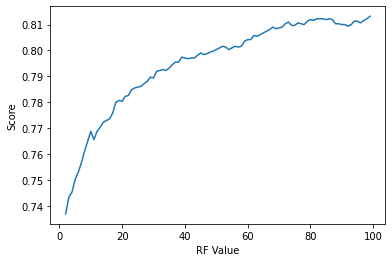

Random Forest Accuracy:  81.32%


In [43]:
scoreListRF = []
for i in range(2,100):
    RFclassifier = RandomForestClassifier(n_estimators =42, random_state = 1, max_leaf_nodes=i)
    RFclassifier.fit(X_train, y_train)
    scoreListRF.append(RFclassifier.score(X_test, y_test))
    
plt.plot(range(2,100), scoreListRF)
plt.xlabel("RF Value")
plt.ylabel("Score")
plt.show()
RFAcc = max(scoreListRF)
print("Random Forest Accuracy:  {:.2f}%".format(RFAcc*100))

* **KNeighborsClassifier**

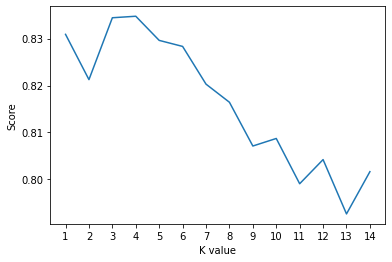

KNN best accuracy: 83.48%


In [44]:
knn = []
for i in range(1,15):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    knn.append(KNclassifier.score(X_test, y_test))
    
plt.plot(range(1,15), knn)
plt.xticks(np.arange(1,15,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(knn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

* **DecisionTreeClassifier**

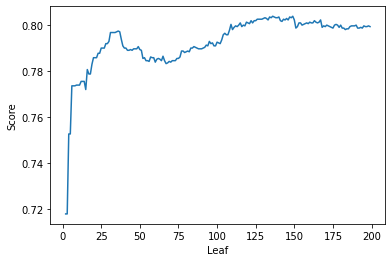

Decision Tree Accuracy: 80.39%


In [45]:
scoreListDT = []
for i in range(2,200):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))
    
plt.plot(range(2,200), scoreListDT)

plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAcc = max(scoreListDT)
print("Decision Tree Accuracy: {:.2f}%".format(DTAcc*100))

In [46]:
compare = pd.DataFrame({"Model": ["CatBoostClassifier",
                                  "XGBClassifier",
                                  "GradientBoostingClassifier", 
                                  "LGBMClassifier",
                                  "RandomForestClassifier",
                                  "KNeighborsClassifier",
                                  "DecisionTreeClassifier"],
                                  "Accuracy": [catboostAcc*100,
                                               xgboostAcc*100,
                                               gbmAcc*100,
                                               lgbmAcc*100,
                                               RFAcc*100,
                                               KNAcc*100,
                                               DTAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,CatBoostClassifier,85.572
1,XGBClassifier,85.443
3,LGBMClassifier,84.960
5,KNeighborsClassifier,83.478
2,GradientBoostingClassifier,82.802
4,RandomForestClassifier,81.320
6,DecisionTreeClassifier,80.386


# **Feature Importance**

In [47]:
rf_model = RandomForestClassifier(random_state=42).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

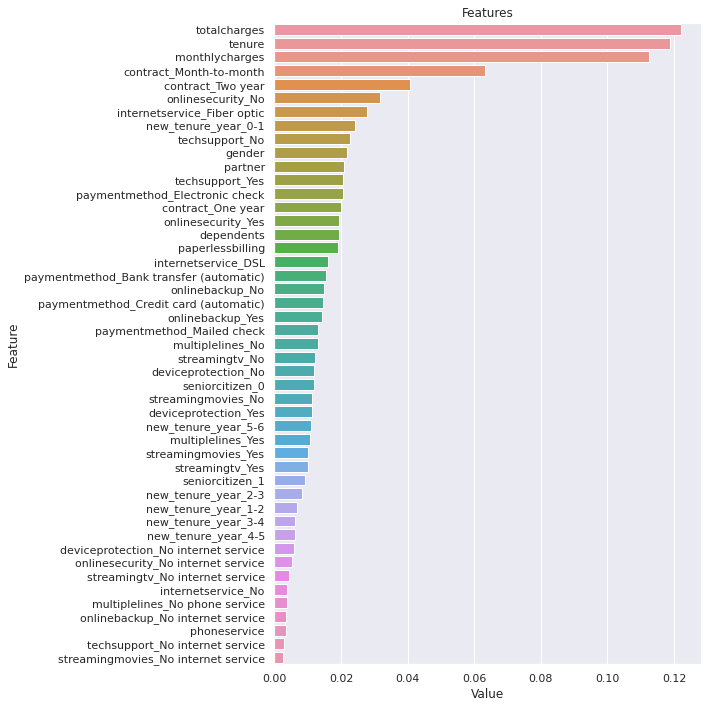

In [48]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                      ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')


plot_importance(rf_model, X_train)

## **If you liked this notebook, please do UPVOTE ⬆️**

## **Thanks🙌**